 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [99]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [100]:
portfolio_whale_path = Path("./Resources/whale_returns.csv")
portfolio_algo_path = Path("./Resources/algo_returns.csv")
portfolio_sp500_path= Path("./Resources/sp500_history.csv")

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [101]:
# Reading whale returns
# Drop nulls
portfolio_whale_df = pd.read_csv(portfolio_whale_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df_cleaned = portfolio_whale_df.dropna().copy()

# Count nulls
count_of_null_dropped = len(portfolio_whale_df) - len(whale_df_cleaned)
print (f"number of null columns dropped : {count_of_null_dropped}")

number of null columns dropped : 1


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [102]:
# Reading algorithmic returns
portfolio_algo_df = pd.read_csv(portfolio_algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
# Drop nulls
algo_df_cleaned = portfolio_whale_df.dropna().copy()
# Count nulls
count_of_null_dropped = len(portfolio_whale_df) - len(whale_df_cleaned)
print (f"number of null columns dropped : {count_of_null_dropped}")

number of null columns dropped : 1


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [103]:
# Reading S&P 500 Closing Prices
portfolio_sp500_df = pd.read_csv(portfolio_sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
# Check Data Types
print(f"S&P portfolio dataframe type is {portfolio_sp500_df.columns}")
# Fix Data Types
#portfolio_sp500_df = portfolio_sp500_df.reset_index()
portfolio_sp500_df.rename(columns = {'C l o s e' : 'Close'}, inplace = True)
# Calculate Daily Returns
portfolio_sp500_df['Close'] = portfolio_sp500_df['Close'].apply(lambda x: float(x.strip("$"))).pct_change()
# Drop nulls
portfolio_sp500_df = portfolio_sp500_df.dropna().copy()
#result = portfolio_sp500_df[portfolio_sp500_df['Date'] >= '2015-03-03']
# Rename `Close` Column to be specific to this portfolio.
portfolio_sp500_df = portfolio_sp500_df.rename(columns ={'Close':'SP500'})

S&P portfolio dataframe type is Index(['Close'], dtype='object')


## Combine Whale, Algorithmic, and S&P 500 Returns

In [104]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios_df = pd.concat([whale_df_cleaned, algo_df_cleaned, portfolio_sp500_df], axis="columns", join="inner")
all_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500
Date,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001266,-0.004981,-0.000496,-0.006569,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,0.002230,0.003241,-0.002534,0.004213,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.004016,0.004076,0.002355,0.006726,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.000582,0.004225,0.005843,-0.001652,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

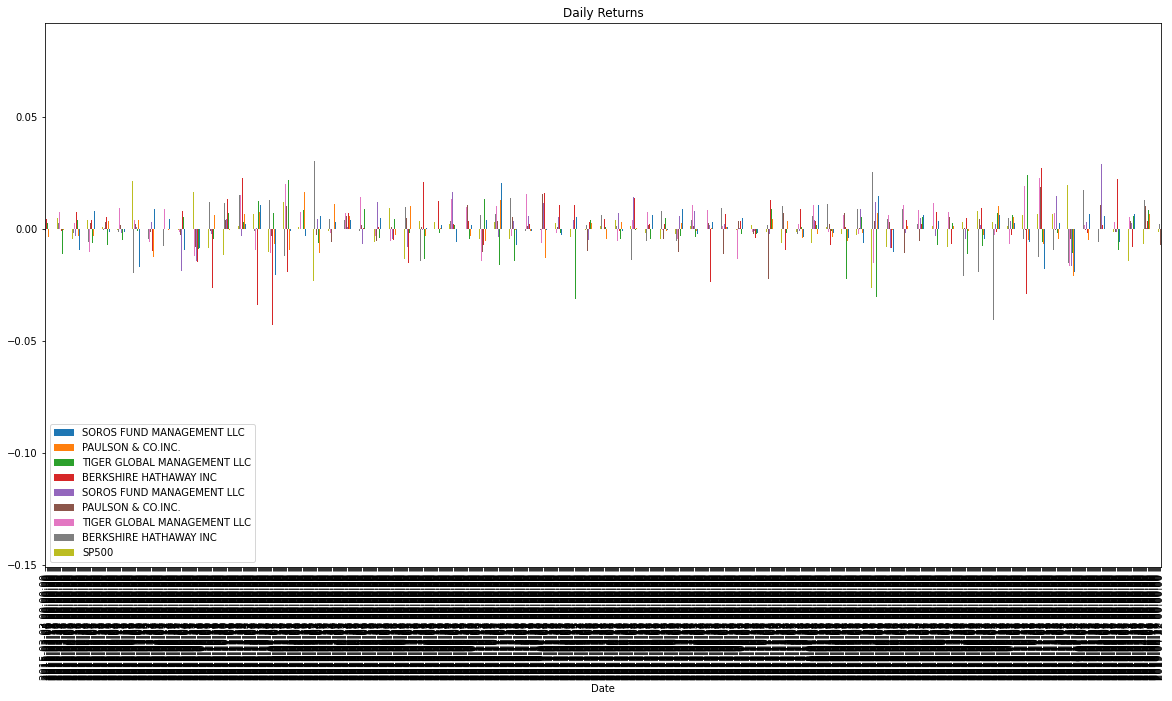

In [105]:
# Plot daily returns of all portfolios
all_portfolios_df.plot.bar(title ='Daily Returns',figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

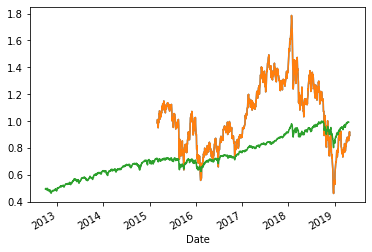

In [106]:
# Calculate cumulative returns of all portfolios
portfolio_whale_ret = whale_df_cleaned.sum(axis=1)
whale_cumulative_ret = (portfolio_whale_ret + 1).cumprod()
whale_cumulative_ret.plot()

portfolio_algo_ret = algo_df_cleaned.sum(axis=1)
algo_cumulative_ret = (portfolio_algo_ret + 1).cumprod()
algo_cumulative_ret.plot()


sp_return = portfolio_sp500_df.sum(axis=1)
sp_cumulative_ret = (sp_return + 1).cumprod()
sp_cumulative_ret.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [ ]:
# Box plot to visually show risk
#TBD



### Calculate Standard Deviations

In [107]:
# Calculate the daily standard deviations of all portfolios

whale_std = whale_df_cleaned.std().sort_values(ascending=False)
whale_std.head()

algo_std = algo_df_cleaned.std().sort_values(ascending=False)
algo_std.head()



BERKSHIRE HATHAWAY INC         0.012831
TIGER GLOBAL MANAGEMENT LLC    0.010824
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
dtype: float64

### Determine which portfolios are riskier than the S&P 500

<AxesSubplot:>

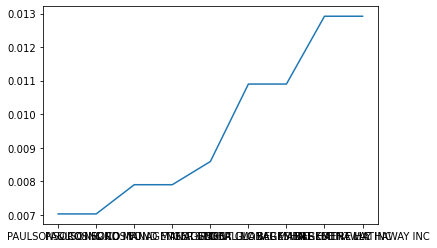

In [320]:
# Calculate  the daily standard deviation of S&P 500
sp_std = all_portfolios_df.std().sort_values()

# Determine which portfolios are riskier than the S&P 500
sp_std.plot()

### Calculate the Annualized Standard Deviation

In [108]:
# Calculate the annualized standard deviation (252 trading days)
whale_annualized_std = whale_std * np.sqrt(252)
whale_annualized_std.head()

algo_annualized_std = algo_std * np.sqrt(252)
algo_annualized_std.head()

sp_sannualized_std = sp_std * np.sqrt(252)
sp_sannualized_std.head()

NameError: name 'sp_std' is not defined

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

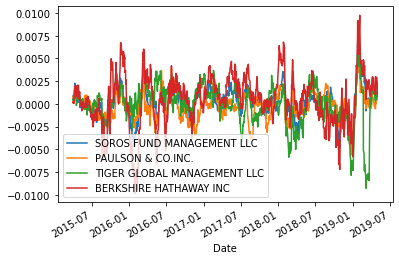

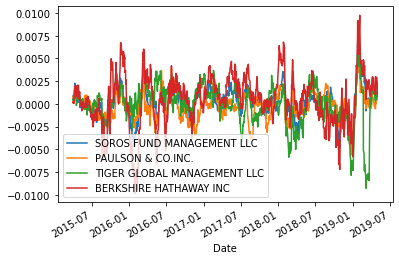

In [324]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviationS
whale_df_cleaned.rolling(window=21).mean().plot()
algo_df_cleaned.rolling(window=21).mean().plot()



### Calculate and plot the correlation

In [326]:
# Calculate the correlation
price_correlation = all_portfolios_df.corr()

# Display de correlation matrix
print("Correlation matrix\n")
print(price_correlation)

Correlation matrix

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699823   
PAULSON & CO.INC.                             0.699823            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561040            0.434308   
BERKSHIRE HATHAWAY INC                        0.754157            0.545451   
SOROS FUND MANAGEMENT LLC                     1.000000            0.699823   
PAULSON & CO.INC.                             0.699823            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561040            0.434308   
BERKSHIRE HATHAWAY INC                        0.754157            0.545451   
SP500                                         0.000574            0.013549   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561040   
PAULSON & CO.INC.                               0.434308   
TIGER GLOBAL MANAGE

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [111]:
# Calculate covariance of a single portfolio

#TBD
#whale_var = all_portfolios_df[all_portfolios_df].var()

# Calculate variance of S&P 500
#whale_var = all_portfolios_df[''].cov(all_portfolios_df['SP500'])

# Computing beta

# Plot beta trend


ValueError: Boolean array expected for the condition, not float64

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [328]:
# Annualized Sharpe Ratios
sharpe_ratios = ((all_portfolios_df.mean()-all_portfolios_df['SP500'].mean()) * 252) / (all_portfolios_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.906838
PAULSON & CO.INC.              0.142411
TIGER GLOBAL MANAGEMENT LLC    0.278448
BERKSHIRE HATHAWAY INC         0.951436
SOROS FUND MANAGEMENT LLC      0.906838
PAULSON & CO.INC.              0.142411
TIGER GLOBAL MANAGEMENT LLC    0.278448
BERKSHIRE HATHAWAY INC         0.951436
SP500                          0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

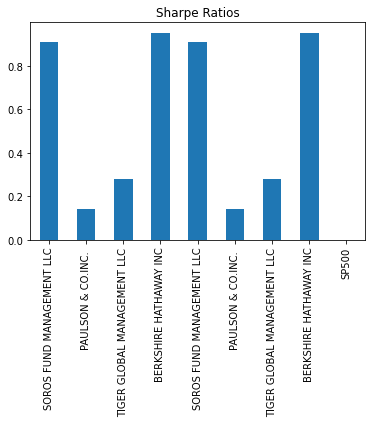

In [329]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algorithmic strategies outperforms SP500

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [13]:
# Reading data from 1st stock
portfolio_goog_path = Path("./Resources/goog_historical.csv")
goog_df = pd.read_csv(portfolio_google_path)
goog_df.head()

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [9]:
# Reading data from 2nd stock
portfolio_aapl_path = Path("./Resources/aapl_historical.csv")
aapl_df = pd.read_csv(portfolio_aapl_path)
aapl_df.head()

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [11]:
# Reading data from 3rd stock
portfolio_cost_path = Path("./Resources/cost_historical.csv")
cost_df = pd.read_csv(portfolio_cost_path)
cost_df.head()

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [90]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([goog_df, aapl_df,cost_df], axis="columns", join="inner")
combined_df.head()

,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38,AAPL,5/9/2019,200.72,COST,5/9/2019,243.47
1,GOOG,5/8/2019,1166.27,AAPL,5/8/2019,202.90,COST,5/8/2019,241.34
2,GOOG,5/7/2019,1174.10,AAPL,5/7/2019,202.86,COST,5/7/2019,240.18
3,GOOG,5/6/2019,1189.39,AAPL,5/6/2019,208.48,COST,5/6/2019,244.23
4,GOOG,5/3/2019,1185.40,AAPL,5/3/2019,211.75,COST,5/3/2019,244.62


In [91]:
# Reset Date index
# Reorganize portfolio data by having a column per symbol
combined_df.columns = ['GOOG', 'DATE','GOOG CLOSE','APPL','APPLE DATE','APPLE CLOSE','COST','COST DATE','COST CLOSE']
combined_df.drop(columns=['GOOG','APPL','APPLE DATE','COST','COST DATE'], inplace=True)
combined_df.set_index(pd.to_datetime(combined_df['DATE'], infer_datetime_format=True), inplace=True)
combined_df.drop(columns=['DATE'], inplace=True)
combined_df.head()

,GOOG CLOSE,APPLE CLOSE,COST CLOSE
DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [96]:
# Calculate daily returns
daily_return = combined_df.pct_change()

# Drop NAs
daily_return = daily_return.dropna()

# Display sample data
print(daily_return)

            GOOG CLOSE  APPLE CLOSE  COST CLOSE
DATE                                           
2019-05-08    0.003347     0.010861   -0.008749
2019-05-07    0.006714    -0.000197   -0.004806
2019-05-06    0.013023     0.027704    0.016862
2019-05-03   -0.003355     0.015685    0.001597
2019-05-02   -0.019226    -0.012279   -0.007890
...                ...          ...         ...
2018-05-17    0.011469     0.003650    0.003217
2018-05-16    0.002948     0.006364   -0.004459
2018-05-15   -0.002348    -0.009246   -0.016255
2018-05-14    0.019431     0.009172    0.002046
2018-05-11   -0.001763     0.002339   -0.000613

[249 rows x 3 columns]


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [112]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_return.dot(weights)
portfolio_returns
# Display sample data


DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
                ...   
2018-05-17    0.006112
2018-05-16    0.001618
2018-05-15   -0.009283
2018-05-14    0.010216
2018-05-11   -0.000012
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [114]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio_return = pd.concat([portfolio_returns, combined_df], axis="columns", join="inner")

,0,GOOG CLOSE,APPLE CLOSE,COST CLOSE
DATE,,,,
2019-05-08,0.001820,1166.27,202.90,241.34
2019-05-07,0.000570,1174.10,202.86,240.18
2019-05-06,0.019196,1189.39,208.48,244.23
2019-05-03,0.004642,1185.40,211.75,244.62
2019-05-02,-0.013131,1162.61,209.15,242.69
...,...,...,...,...
2018-05-17,0.006112,1078.59,186.99,199.60
2018-05-16,0.001618,1081.77,188.18,198.71
2018-05-15,-0.009283,1079.23,186.44,195.48


In [115]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio_return.dropna()

,0,GOOG CLOSE,APPLE CLOSE,COST CLOSE
DATE,,,,
2019-05-08,0.001820,1166.27,202.90,241.34
2019-05-07,0.000570,1174.10,202.86,240.18
2019-05-06,0.019196,1189.39,208.48,244.23
2019-05-03,0.004642,1185.40,211.75,244.62
2019-05-02,-0.013131,1162.61,209.15,242.69
...,...,...,...,...
2018-05-17,0.006112,1078.59,186.99,199.60
2018-05-16,0.001618,1081.77,188.18,198.71
2018-05-15,-0.009283,1079.23,186.44,195.48


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [116]:
# Calculate the annualized `std`
daily_combined_std = daily_return.std()
combined_annualized_std = daily_combined_std * np.sqrt(252)
daily_combined_std

GOOG CLOSE     0.016714
APPLE CLOSE    0.018923
COST CLOSE     0.013439
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='DATE'>

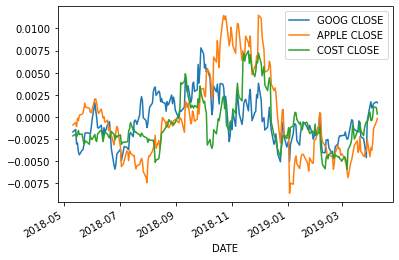

In [118]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
daily_return.rolling(window=21).mean().plot()

### Calculate and plot the correlation

<AxesSubplot:>

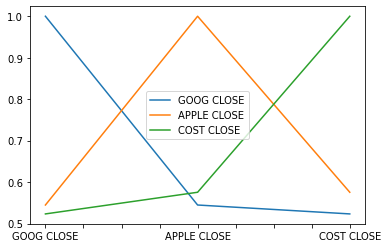

In [119]:
# Calculate and plot the correlation
combined_cor = combined_df.corr()
combined_cor.plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [125]:
# Calculate and plot Beta
#TBD S&P Table needs to be read and concatenated
all_portfolio_combined_df = pd.concat([portfolio_sp500_df,combined_df], axis="columns", join="inner")
all_portfolio_combined_df

,SP500,GOOG CLOSE,APPLE CLOSE,COST CLOSE
2019-04-22,-0.008764,1248.84,204.53,243.42
2019-04-18,-0.001011,1236.37,203.86,245.81
2019-04-17,-0.001577,1236.34,203.13,245.56
2019-04-16,0.002279,1227.13,199.25,245.34
2019-04-15,-0.000509,1221.10,199.23,246.33
...,...,...,...,...
2018-05-17,0.002639,1078.59,186.99,199.60
2018-05-16,0.000857,1081.77,188.18,198.71
2018-05-15,-0.004044,1079.23,186.44,195.48
2018-05-14,0.006889,1100.20,188.15,195.88


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [126]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_combined = ((all_portfolio_combined_df.mean()-all_portfolio_combined_df['SP500'].mean()) * 252) / (all_portfolio_combined_df.std() * np.sqrt(252))
sharpe_ratios_combined

SP500            0.000000
GOOG CLOSE     270.572017
APPLE CLOSE    139.440253
COST CLOSE     253.103746
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

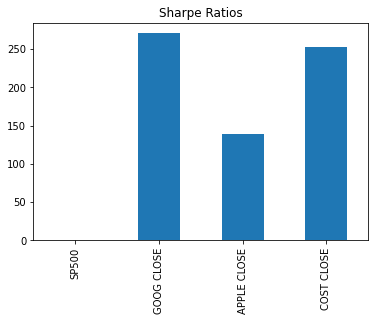

In [127]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_combined.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!